In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import sns
import numpy as np

In [105]:
df_ml = pd.read_csv('../artifacts/results_ml_models.csv')
df_cnn = pd.read_csv('../artifacts/results_cnn_models.csv')
df_trans = pd.read_csv('../artifacts/results_Transformer_models.csv')

# CNN Models

In [106]:
df_cnn[['model','acc_test']]

,model,acc_test
0,HopefullNet,0.981183
1,ShallowConvNet,0.365085
2,EEGNet,0.356352
3,DeepConvNet,0.288557


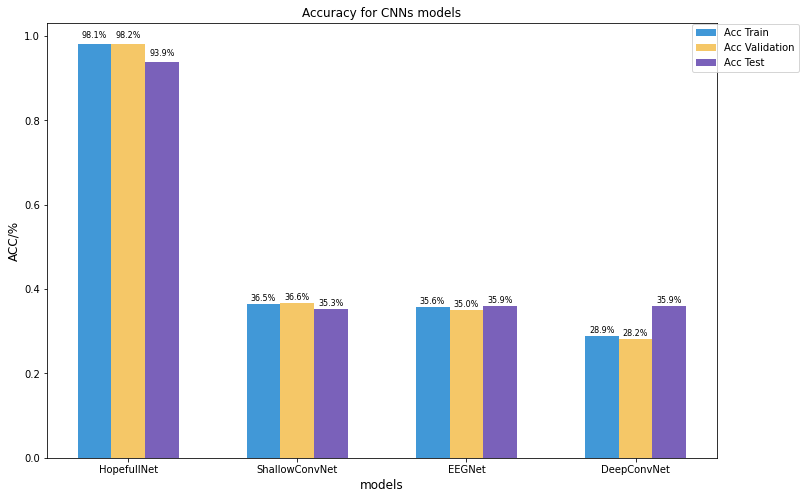

In [107]:
top_1 = df_cnn.iloc[:,5]
top_3 = df_cnn.iloc[:,4]
top_5 = df_cnn.iloc[:,3]
xlabels = df_cnn.iloc[:,0]
N = len(df_cnn.iloc[:,0])
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7')
rects2 = ax.bar(ind + width, top_3, width, color='#f5c767')
rects3 = ax.bar(ind + 2*width, top_5, width, color='#7a61ba')
ax.set_xticks(ind + width)
ax.set_xticklabels(xlabels,fontsize=10)
ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("ACC/%", fontsize=12)
ax.set_title('Accuracy for CNNs models')
ax.legend((rects1[0], rects2[0],rects3[0]),('Acc Train', 'Acc Validation','Acc Test'),bbox_to_anchor=(1.13, 1.01))
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100,1))+'%' ,ha='center', va='bottom',fontsize=8)

labelvalue(rects1)
labelvalue(rects2)
labelvalue(rects3)
plt.savefig('../artifacts/barplot_cnn.png',dpi=200, format='png', bbox_inches='tight')
plt.show()

# Machine Learning Models

In [108]:

df_ml['label'] = df_ml.pipeline.replace("time domain features -> wavelet", "TmFq + Wvl") +' + '+ df_ml.model_name
df_ml


,cross_val_score,Accuracy,Precision,Recall,F1_score,auc,kappa,mathew_coef,dataset,subject,pipeline,model_name,label
0,0.894,0.761997,0.819119,0.761997,0.762921,0.425421,0.684214,0.704129,Motor Imaginary,All subjects,PCA,KNN,PCA + KNN
1,0.625,0.521563,0.563878,0.521563,0.535215,0.546745,0.343241,0.347370,Motor Imaginary,All subjects,PCA,XGB,PCA + XGB
2,0.344,0.378185,0.455839,0.378185,0.401871,0.553300,0.171174,0.175899,Motor Imaginary,All subjects,PCA,SVM,PCA + SVM
3,0.335,0.387683,0.353577,0.387683,0.367147,0.521749,0.060176,0.060873,Motor Imaginary,All subjects,time domain features -> wavelet,XGB,TmFq + Wvl + XGB
4,0.294,0.271450,0.337800,0.271450,0.292712,0.509438,0.031221,0.032137,Motor Imaginary,All subjects,time domain features -> wavelet,KNN,TmFq + Wvl + KNN
5,0.270,0.243630,0.314166,0.243630,0.265563,0.505273,-0.000095,-0.000099,Motor Imaginary,All subjects,time domain features -> wavelet,SVM,TmFq + Wvl + SVM


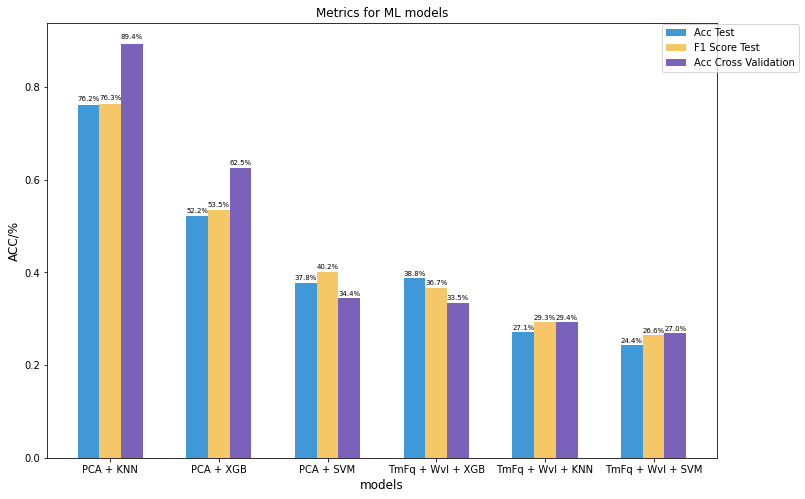

In [109]:
top_1 = df_ml.iloc[:,1]
top_3 = df_ml.iloc[:,4]
top_5 = df_ml.iloc[:,0]
xlabels = df_ml.iloc[:,-1]
N = len(df_ml.iloc[:,0])
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7')
rects2 = ax.bar(ind + width, top_3, width, color='#f5c767')
rects3 = ax.bar(ind + 2*width, top_5, width, color='#7a61ba')
ax.set_xticks(ind + width)
ax.set_xticklabels(xlabels,fontsize=10)
ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("ACC/%", fontsize=12)
ax.set_title('Metrics for ML models')
ax.legend((rects1[0], rects2[0],rects3[0]),('Acc Test', 'F1 Score Test','Acc Cross Validation'),bbox_to_anchor=(1.13, 1.01))
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100,1))+'%' ,ha='center', va='bottom',fontsize=7)

labelvalue(rects1)
labelvalue(rects2)
labelvalue(rects3)
plt.savefig('../artifacts/barplot_ml.png',dpi=200, format='png', bbox_inches='tight')
plt.show()

# Transformers Models

In [110]:
df_trans

,model,dataset,subject,acc_train,acc_val,acc_test
0,Transformer Positional,Motor Imaginary,All,0.747110,0.702170,0.695777
1,Transformer,Motor Imaginary,All,0.782506,0.659584,0.684703


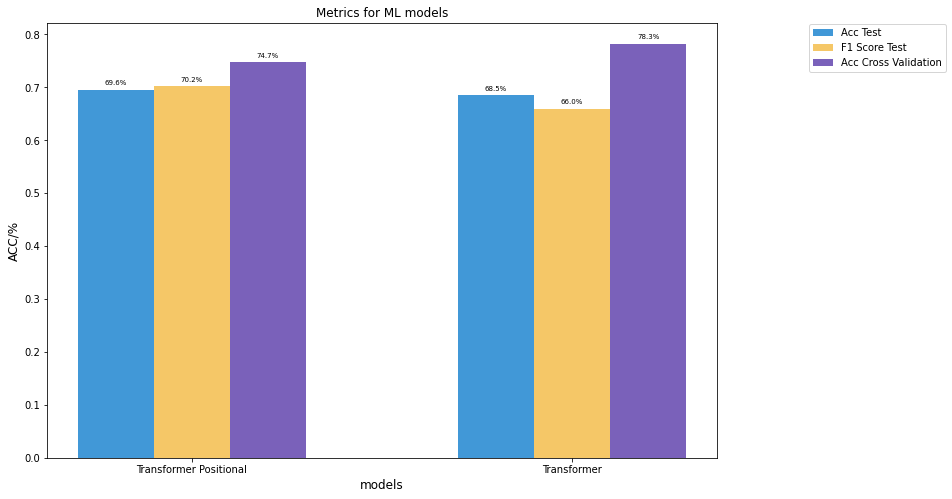

In [111]:
top_1 = df_trans.iloc[:,5]
top_3 = df_trans.iloc[:,4]
top_5 = df_trans.iloc[:,3]
xlabels = df_trans.iloc[:,0]
N = len(df_trans.iloc[:,0])
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7')
rects2 = ax.bar(ind + width, top_3, width, color='#f5c767')
rects3 = ax.bar(ind + 2*width, top_5, width, color='#7a61ba')
ax.set_xticks(ind + width)
ax.set_xticklabels(xlabels,fontsize=10)
ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("ACC/%", fontsize=12)
ax.set_title('Metrics for ML models')
ax.legend((rects1[0], rects2[0],rects3[0]),('Acc Test', 'F1 Score Test','Acc Cross Validation'),bbox_to_anchor=(1.13, 1.01))
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100,1))+'%' ,ha='center', va='bottom',fontsize=7)

labelvalue(rects1)
labelvalue(rects2)
labelvalue(rects3)
plt.savefig('../artifacts/barplot_trans.png',dpi=200, format='png', bbox_inches='tight')
plt.show()

# Comparing Models

In [117]:
all_models = pd.concat([
                    df_trans[['model','acc_test']].rename(columns = {'model':'Model', 'acc_test':'Accuracy'}), 
                    df_cnn[['model','acc_test']].rename(columns = {'model':'Model', 'acc_test':'Accuracy'}), 
                    df_ml[['label','Accuracy']].rename(columns = {'label':'Model'})], axis=0, ignore_index=True)
all_models = all_models.sort_values(['Accuracy'], ascending=False)
all_models.to_csv('../artifacts/results_all_models.csv', index=False, header=True)                    
all_models                    

,Model,Accuracy
2,HopefullNet,0.981183
6,PCA + KNN,0.761997
0,Transformer Positional,0.695777
1,Transformer,0.684703
7,PCA + XGB,0.521563
9,TmFq + Wvl + XGB,0.387683
8,PCA + SVM,0.378185
3,ShallowConvNet,0.365085
4,EEGNet,0.356352
5,DeepConvNet,0.288557


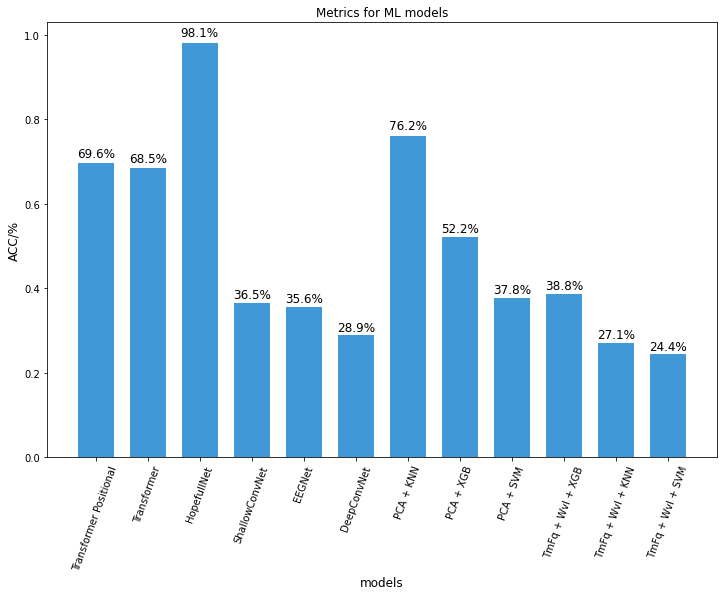

In [113]:
top_1 = all_models.iloc[:,1]
xlabels = all_models.iloc[:,0]
N = len(all_models.iloc[:,0])
ind = np.arange(N)  # the x locations for the groups
width = 0.7      # the width of the bars
fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(ind, top_1, width, color='#4198d7')
ax.set_xticks(ind )
ax.set_xticklabels(xlabels,fontsize=10, rotation=70)
ax.set_xlabel("models", fontsize=12)
ax.set_ylabel("ACC/%", fontsize=12)
ax.set_title('Metrics for ML models')
# ax.legend(rects1[0],'Accuracy Test')
def labelvalue(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
        str(round(height*100,1))+'%' ,ha='center', va='bottom',fontsize=12)

labelvalue(rects1)

plt.savefig('../artifacts/barplot_all.png',dpi=200, format='png', bbox_inches='tight')
plt.show()